In [1]:
import numpy as np
import pandas as pd
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
import glob
import matplotlib.pyplot as plt
import cv2

In [2]:
base_path = "C:/Users/Lnovo/OneDrive/Desktop/IOT_poject/IIT/Eye disease/cell_images"

train = base_path + '/Train'
test = base_path + '/Test'
val = base_path + '/Val'

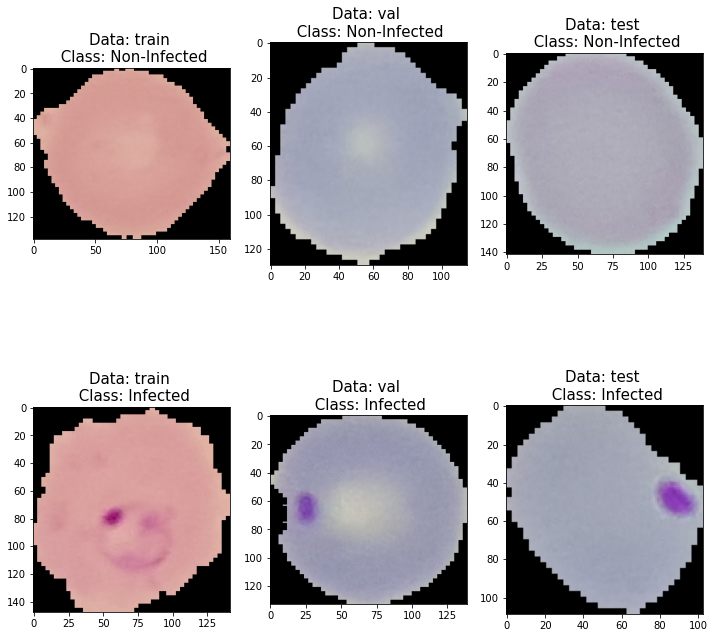

In [3]:
fig, ax = plt.subplots(2, 3, figsize = (12, 12))
ax = ax.ravel()

for i, var in enumerate(['train', 'val', 'test']):
    Non_Infected_set = glob.glob(base_path + "/" + var +"/Non-Infected/*.png")
    Infected_set = glob.glob(base_path + "/" + var + "/Infected/*.png")
    ax[i].imshow(plt.imread(Non_Infected_set[0]), cmap = 'gray')
    ax[i].set_title('Data: {} \n Class: Non-Infected'.format(var), fontsize = 15)
    ax[i+3].imshow(plt.imread(Infected_set[0]), cmap = 'gray')
    ax[i+3].set_title('Data: {} \n Class: Infected'.format(var), fontsize = 15)
    

C:\Users\Lnovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

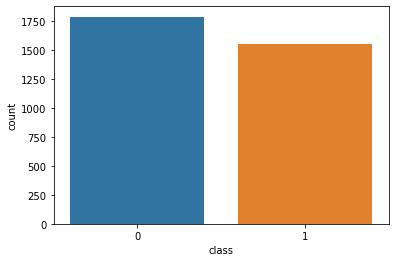

In [4]:
Non_Infected_set = glob.glob(base_path + "/" + var +"/Non-Infected/*.png")
Infected_set = glob.glob(base_path + "/" + var + "/Infected/*.png")
data = pd.DataFrame(np.concatenate([[0]*len(Non_Infected_set), [1]*len(Infected_set)]), columns=["class"])
sns.countplot(data['class'],data=data)

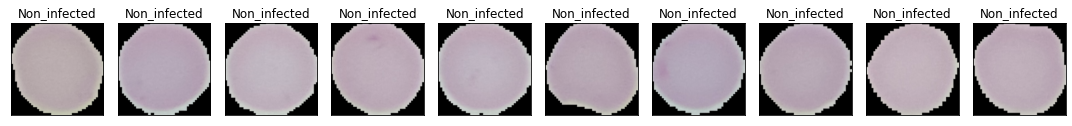

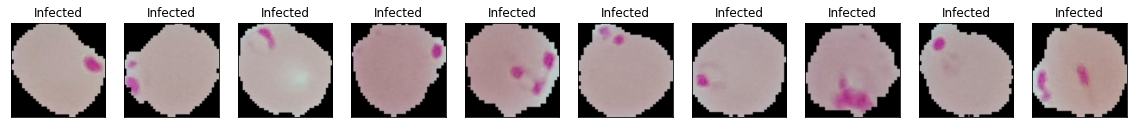

In [5]:
s = (256, 256)

fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(Non_Infected_set[i])
    img = cv2.resize(img, s)
    ax.imshow(img)
    ax.set_title("Non_infected")
fig.tight_layout()    
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(20,20), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(Infected_set[i])
    img = cv2.resize(img, s)
    ax.imshow(img)
    ax.set_title("Infected")
plt.show()


In [6]:
gen_train = ImageDataGenerator(rescale = 1./255., zoom_range = 0.2)
gen_val = ImageDataGenerator(rescale = 1./255.)
gen_test = ImageDataGenerator(rescale = 1./255.)

train_gen = gen_train.flow_from_directory(train, batch_size = 20, class_mode = 'binary', target_size = (125, 125))
validation_gen = gen_val.flow_from_directory(val, batch_size = 20, class_mode = 'binary', target_size=(125, 125))
test_gen = gen_test.flow_from_directory(test, shuffle = False, batch_size=20, class_mode = 'binary', target_size=(125, 125))

Found 20689 images belonging to 2 classes.
Found 3528 images belonging to 2 classes.
Found 3341 images belonging to 2 classes.


In [8]:
model1 = Sequential()
model1.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(125,125,3)))
model1.add(MaxPooling2D())
model1.add(Conv2D(32, 3, padding='same', activation='relu'))
model1.add(MaxPooling2D())
model1.add(Conv2D(64, 3, padding='same', activation='relu'))
model1.add(MaxPooling2D())
model1.add(Flatten())
model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(1, activation= 'sigmoid'))
model1.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 125, 125, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 31, 31, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)            

In [9]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [10]:
history= model1.fit(train_gen, validation_data = validation_gen, epochs = 10, batch_size=128, verbose=1,callbacks = callback )

Epoch 1/10
1035/1035 [==============================] - 169s 164ms/step - loss: 0.3190 - accuracy: 0.8562 - val_loss: 0.1740 - val_accuracy: 0.9498
Epoch 2/10
1035/1035 [==============================] - 160s 154ms/step - loss: 0.1769 - accuracy: 0.9423 - val_loss: 0.1760 - val_accuracy: 0.9524
Epoch 3/10
1035/1035 [==============================] - 168s 163ms/step - loss: 0.1522 - accuracy: 0.9500 - val_loss: 0.1333 - val_accuracy: 0.9691
Epoch 4/10
1035/1035 [==============================] - 176s 170ms/step - loss: 0.1391 - accuracy: 0.9547 - val_loss: 0.1349 - val_accuracy: 0.9615
Epoch 5/10
1035/1035 [==============================] - 174s 168ms/step - loss: 0.1295 - accuracy: 0.9562 - val_loss: 0.1220 - val_accuracy: 0.9702
Epoch 6/10
1035/1035 [==============================] - 174s 168ms/step - loss: 0.1254 - accuracy: 0.9579 - val_loss: 0.1380 - val_accuracy: 0.9674
Epoch 7/10
1035/1035 [==============================] - 171s 165ms/step - loss: 0.1202 - accuracy: 0.9597 - val_

In [ ]:
# model1.save_weights("95-96_malaria.h5")
# model1.save("95-96_MalariaModel.h5")

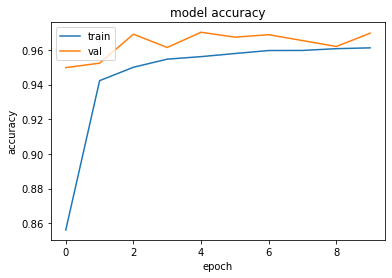

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


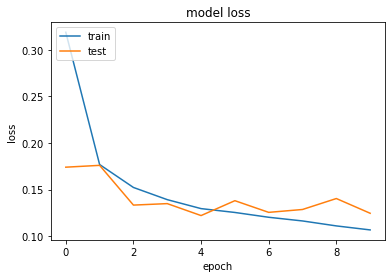

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
y_pred = model1.predict(test_gen)

y_pred

array([[9.5328689e-04],
       [6.3907206e-03],
       [1.1500716e-03],
       ...,
       [9.9592006e-01],
       [9.9816847e-01],
       [9.9228418e-01]], dtype=float32)

In [ ]:
y_pred[-1][0]

In [41]:
y_pred_list = []

for i in range(len(y_pred)):
    if y_pred[i]<=0.75:    
        y_pred_list.append(0.0)
    else:
        y_pred_list.append(1.0)
        
y_pred_list

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [37]:
NI = glob.glob(base_path + '/Test/Non-Infected/*.png')
IF = glob.glob(base_path + '/Test/Infected/*.png')

out = []

for i in range(len(IF)):
    out.append(0.0)
for i in range(len(NI)):
    out.append(1.0)
v=np.array(out)

In [42]:
matrix = confusion_matrix(out, y_pred_list, labels=[0,1])


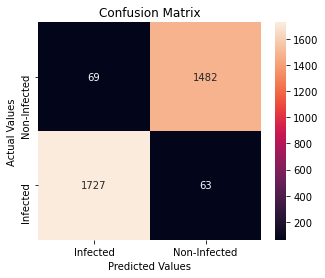

In [43]:
cm_df = pd.DataFrame(matrix, index = ['Non-Infected','Infected'], columns = ['Non-Infected','Infected'])
plt.figure(figsize=(5,4))
ax = sns.heatmap(cm_df, annot=True, fmt="d")
ax.invert_xaxis()
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()